In [1]:
from matplotlib.patches import Polygon

In [2]:
Nr1 = pd.read_pickle('./data/params_Nr1_smex_method7.pcl')
P301 = pd.read_pickle('./data/params_P301_smex_method7.pcl')
Vcm = pd.read_pickle('./data/params_Vcm_smex_method7.pcl')

In [3]:
Nr1.head()

,SMR,TpeakSWE,peakSWE,ablSeas,Tnosnow,ref,date_ONS,DOAS,date_AS,idx,date_peakSWE,temp_out,MAP
114927,0.007447,180.0,0.413660,56.0,236.0,2010,2010-05-24,15,2009-10-15,0,2010-03-29,True,6.165935
90071,0.017967,202.0,0.423372,24.0,226.0,2010,2010-05-14,15,2009-10-15,1,2010-04-20,False,6.178629
55307,0.014164,236.0,0.470056,34.0,270.0,2010,2010-06-27,15,2009-10-15,2,2010-05-24,False,6.099164
13817,0.013006,198.0,0.478686,37.0,235.0,2010,2010-05-23,15,2009-10-15,3,2010-04-16,False,6.165935
71193,0.014850,235.0,0.410855,28.0,263.0,2010,2010-06-20,15,2009-10-15,4,2010-05-23,False,6.099164


In [4]:
# extract the points

df = Nr1

minTpeakSWE = df.TpeakSWE.min()
maxTpeakSWE = df.TpeakSWE.max()

minTnosnow = df.Tnosnow.min()
maxTnosnow = df.Tnosnow.max()

minpeakSWE = df.peakSWE.min()
maxpeakSWE = df.peakSWE.max()

DOAS = df.DOAS.mean()

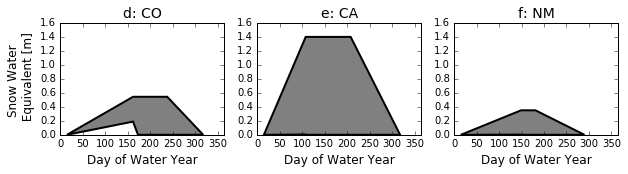

In [5]:
lw = 2
ls = '-'
axfont = 12
x = 'Day of Water Year'
y = 'Snow Water \n Equivalent [m]'

fig = plt.figure(figsize=(10,2))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

for ax,df,site,letter in zip([ax1,ax2,ax3],[Nr1,P301,Vcm],['CO','CA','NM'],['d','e','f']):

    minTpeakSWE = df.TpeakSWE.min()
    maxTpeakSWE = df.TpeakSWE.max()

    minTnosnow = df.Tnosnow.min()
    maxTnosnow = df.Tnosnow.max()

    minpeakSWE = df.peakSWE.min()
    maxpeakSWE = df.peakSWE.max()

    DOAS = df.DOAS.mean()

    pts = np.array([[DOAS,0],[minTpeakSWE,maxpeakSWE],[maxTpeakSWE,maxpeakSWE],[maxTnosnow,0],[minTnosnow,0],
                   [minTpeakSWE,minpeakSWE]])
# [maxTpeakSWE,minpeakSWE],
    p = Polygon(pts, closed=True, alpha = 1,edgecolor='k',facecolor='0.5',lw=lw,ls=ls)
    ax.add_patch(p)

    ax.set_xlim(0,365)
    ax.set_ylim(0,1.6)
    ax.set_xlabel(x,fontsize = axfont)
    
    ax.set_title('%s: %s'%(letter,site), fontsize=axfont+2)

ax1.set_ylabel(y, fontsize = axfont)

plt.savefig('./figures/smex7_scenario_comparison.png',dpi=300,bbox_inches='tight')
plt.savefig('./figures/smex7_scenario_comparison.pdf',bbox_inches='tight')